# Задание 3

### Выделить и посчитать монеты: общее количество (большие отдельно, маленькие отдельно)

In [1]:
import cv2
import matplotlib.pyplot as plt 
from scipy import ndimage as nd
import numpy as np

## Исходное изображение

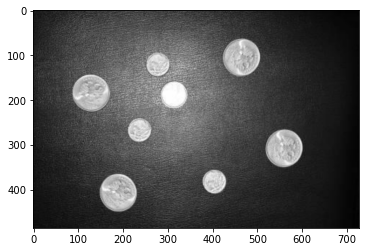

In [2]:
image = cv2.imread('3.png', cv2.IMREAD_GRAYSCALE)
plt.imshow(image, cmap='gray')

## 1. Посчитаем и выделим маленькие монеты

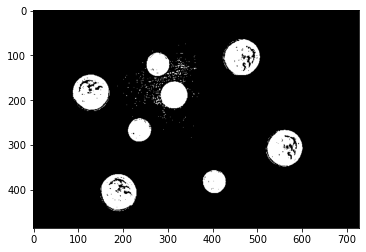

In [3]:
_, thresholdMarkers = cv2.threshold(image, 170, 255, cv2.THRESH_BINARY)
plt.imshow(thresholdMarkers, cmap='gray')

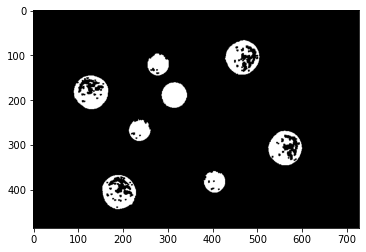

In [4]:
kernel1 = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, ksize = (4, 4))
threshold1 = cv2.erode(thresholdMarkers, kernel1)
plt.imshow(threshold1, cmap='gray')

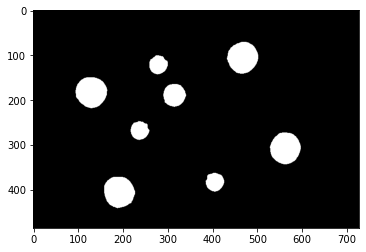

In [5]:
kernel2dilate =  cv2.getStructuringElement(cv2.MORPH_ELLIPSE, ksize = (14, 14))
kernel2erode =  cv2.getStructuringElement(cv2.MORPH_ELLIPSE, ksize = (20, 20))
verificationImage = cv2.dilate(threshold1, kernel2dilate)
verificationImage = cv2.erode(verificationImage, kernel2erode)
plt.imshow(verificationImage, cmap='gray')

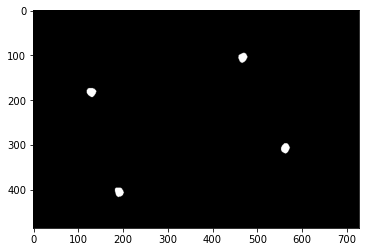

In [6]:
kernel3 = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, ksize = (48, 48))
ImageWithoutSmall = cv2.erode(verificationImage, kernel3)
plt.imshow(ImageWithoutSmall, cmap='gray')

In [7]:
CountBig, markers1 = cv2.connectedComponents(ImageWithoutSmall)

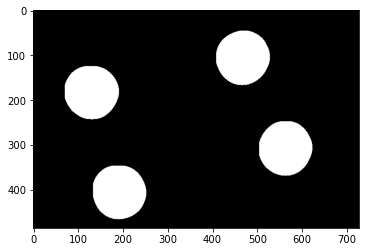

In [8]:
kernel4 = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, ksize = (100, 100))
ImageWithoutSmall2 = cv2.dilate(ImageWithoutSmall, kernel4)
plt.imshow(ImageWithoutSmall2, cmap='gray')

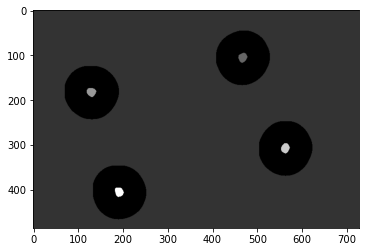

In [9]:
markers1 +=1
markers1[markers1==1]=0
markers1[ImageWithoutSmall2==0]=1
plt.imshow(markers1, cmap= "gray")

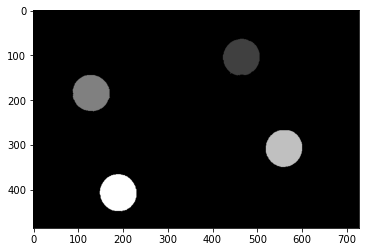

In [10]:
image1 = cv2.imread('3.png', cv2.COLOR_BGR2GRAY)
bigCoins = cv2.watershed(image1,markers1)
bigCoins[bigCoins==-1]=1
bigCoins=bigCoins-1
plt.imshow(bigCoins, cmap='gray')

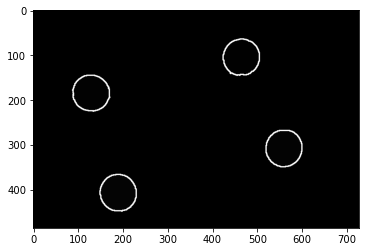

In [11]:
bigCoins = np.uint8(bigCoins)
contours1, hierarchy = cv2.findContours( bigCoins, cv2.RETR_TREE,cv2.CHAIN_APPROX_SIMPLE)
cv2.drawContours(bigCoins, contours1, -1, (255,0,0), 2)
plt.imshow(bigCoins,cmap='gray')

big coins:  4


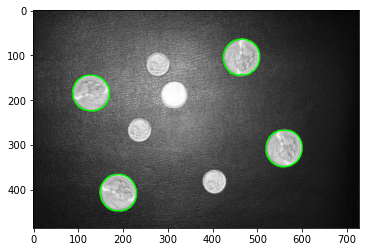

In [12]:
image1[bigCoins==255] = [0,255,0]
CountBig=CountBig-1
plt.imshow(image1,cmap='gray')
print('big coins: ', CountBig)

## 2. Посчитаем и выделим маленькие монеты

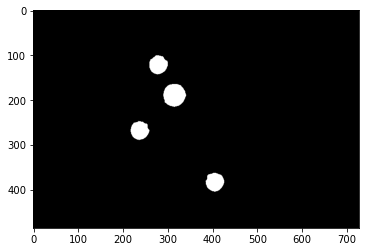

In [13]:
ImageWithoutBig = verificationImage - ImageWithoutSmall2
_, ImageWithoutBig = cv2.threshold(ImageWithoutBig, 170, 255, cv2.THRESH_BINARY)
plt.imshow(ImageWithoutBig, cmap='gray')

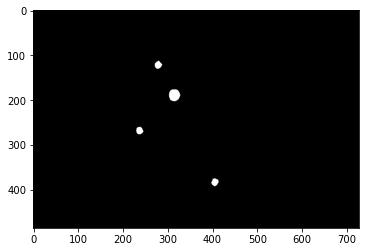

In [14]:
kernel6 = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, ksize = (25, 25))
ImageWithoutBig2 = cv2.erode(ImageWithoutBig, kernel6)
plt.imshow(ImageWithoutBig2, cmap= "gray")

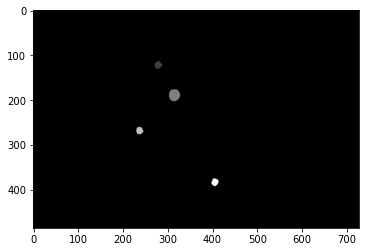

In [15]:
CountSmall, markers2 = cv2.connectedComponents(ImageWithoutBig2)
plt.imshow(markers2, cmap= "gray")

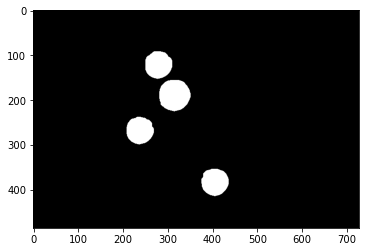

In [16]:
kernel6 = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, ksize = (20, 20))
ImageWithoutBig2 = cv2.dilate(ImageWithoutBig, kernel6)
plt.imshow(ImageWithoutBig2, cmap= "gray")

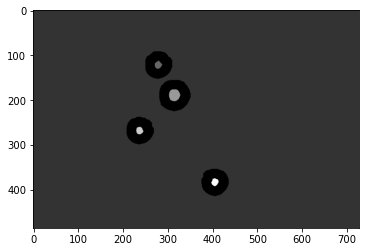

In [17]:
markers2 +=1
markers2[markers2==1]=0
markers2[ImageWithoutBig2==0]=1
plt.imshow(markers2, cmap= "gray")

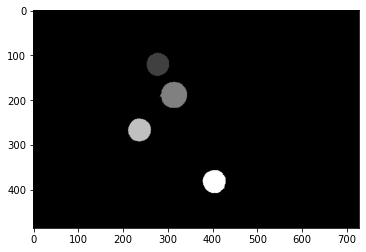

In [18]:
image2 = cv2.imread('3.png', cv2.COLOR_BGR2GRAY)
smallCoins = cv2.watershed(image2,markers2)
smallCoins[smallCoins==-1]=1
smallCoins=smallCoins-1
plt.imshow(smallCoins, cmap='gray')

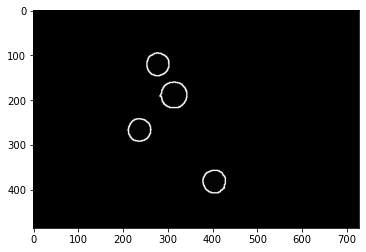

In [19]:
smallCoins = np.uint8(smallCoins)
contours2, hierarchy = cv2.findContours( smallCoins, cv2.RETR_TREE,cv2.CHAIN_APPROX_SIMPLE)
cv2.drawContours(smallCoins, contours2, -1, (255,0,0), 2)
plt.imshow(smallCoins,cmap='gray')

small coins:  4


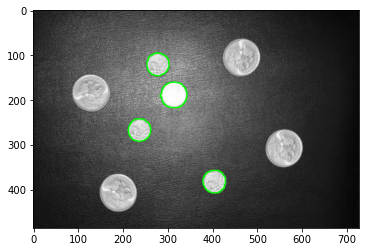

In [20]:
image2[smallCoins==255] = [0,255,0]
CountSmall=CountSmall-1
plt.imshow(image2,cmap='gray')
print('small coins: ', CountSmall)

## 3.Посчитаем и выделим все монеты

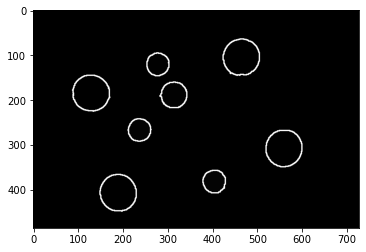

In [21]:
allCoins = smallCoins
smallCoins[bigCoins==255] =255
plt.imshow(allCoins,cmap='gray')


all coins:  8


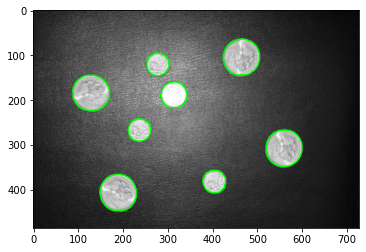

In [22]:
image3 = cv2.imread('3.png', cv2.COLOR_BGR2GRAY)
image3[allCoins==255] = [0,255,0]
CountAll = CountBig  +CountSmall
plt.imshow(image3,cmap='gray')
print('all coins: ', CountAll)